# Importing Python Packages for Model Traing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

# Classification models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier

# Classification metrics (not regression metrics)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings

## Importing Data From CSV file

In [2]:
df = pd.DataFrame(pd.read_csv("data/heart.csv"))

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Removing Outliers from Data

In [4]:
columns = ['Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBP']
def remove_outliers_iqr(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        return df
df = remove_outliers_iqr(df, columns)
df.shape

(735, 12)

#### Preparing X and Y Variables for Prediction

In [5]:
X = df.drop(columns = ['HeartDisease'],axis = 1)

In [6]:
Y = df['HeartDisease']

Column Transformer

In [7]:
ddf = df.drop(columns='HeartDisease',axis=1)
num_features = ddf.select_dtypes(exclude='object').columns
cat_features = df.select_dtypes(include='object').columns

print(num_features,cat_features)

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features),
    ]
)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object') Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [8]:
X = preprocessor.fit_transform(X)
print(X)

[[ 0.          1.          0.         ... -0.44392387  1.2957169
  -0.84076448]
 [ 1.          0.          0.         ... -0.44392387  0.6421901
   0.0880825 ]
 [ 0.          1.          0.         ... -0.44392387 -1.72684452
  -0.84076448]
 ...
 [ 0.          1.          1.         ... -0.44392387 -1.0324723
   0.27385189]
 [ 1.          0.          0.         ... -0.44392387  1.37740775
  -0.84076448]
 [ 0.          1.          0.         ... -0.44392387  1.33656232
  -0.84076448]]


Splitting Data in train_test clusters

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print('Shape of X_train data:',X_train.shape,'Shape of X_test data:',X_test.shape)
print('Shape of Y_train data:',Y_train.shape,'Shape of Y_test data:',Y_test.shape)
print('Shape of Original X data:',X.shape,'Shape of Original Y data:',Y.shape)

Shape of X_train data: (588, 20) Shape of X_test data: (147, 20)
Shape of Y_train data: (588,) Shape of Y_test data: (147,)
Shape of Original X data: (735, 20) Shape of Original Y data: (735,)


### Create an Evaluation Function to give all metrics after Model Training

In [10]:
def evaluate_model(true, predicted):
    acc = accuracy_score(true, predicted)
    prec = precision_score(true, predicted)
    rec = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    return acc,prec,rec,f1

Model Dictionary for evaluating all the Classification Models

In [11]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "K-Neighbors Classifier" : KNeighborsClassifier(),
    "SVC" : SVC(probability=True),
    "Gradient Boosting Classifier" : GradientBoostingClassifier(),
    "Random Forest Classifier" : RandomForestClassifier(),
    "XGBClassifier" : XGBClassifier(),
    "CatBoostClassifier" : CatBoostClassifier(verbose=False),
    "AdaBoostClassifier" : AdaBoostClassifier(),
    "MLP Classifier" : MLPClassifier(max_iter=1000),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),

}
model_list = []
f1_list = []
Recall_list = []
precision_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,Y_train)

    Y_train_predict = model.predict(X_train)
    Y_test_predict = model.predict(X_test)

    model_train_acc,model_train_pred, model_train_recall, model_train_f1 = evaluate_model(Y_train,Y_train_predict)
    model_test_acc, model_test_pred, model_test_recall,model_test_f1 = evaluate_model(Y_test,Y_test_predict)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for Training DataSet ')
    print("=> Accuracy of model: {:.4f}".format(model_train_acc))
    print("=> Recall Score:{:.4f}".format(model_train_recall))
    print("=> Precision Score: {:.4f}".format(model_train_pred))    
    print("=> F1 Score: {:.4f}".format(model_train_f1))

    print("-"*43)

    print('Model Performance for Testing DataSet ')
    print("=> Accuracy of model: {:.4f}".format(model_test_acc))
    print("=> Recall Score:{:.4f}".format(model_test_recall))
    print("=> F1 Score: {:.4f}".format(model_test_f1))
    print("=> Precision Score: {:.4f}".format(model_test_pred))
    f1_list.append(model_test_f1)
    Recall_list.append(model_test_recall)
    precision_list.append(model_test_pred)

    print("="*43)
    print('\n')


Logistic Regression
Model Performance for Training DataSet 
=> Accuracy of model: 0.8759
=> Recall Score:0.8750
=> Precision Score: 0.8592
=> F1 Score: 0.8670
-------------------------------------------
Model Performance for Testing DataSet 
=> Accuracy of model: 0.8299
=> Recall Score:0.8077
=> F1 Score: 0.8344
=> Precision Score: 0.8630


K-Neighbors Classifier
Model Performance for Training DataSet 
=> Accuracy of model: 0.8878
=> Recall Score:0.8897
=> Precision Score: 0.8705
=> F1 Score: 0.8800
-------------------------------------------
Model Performance for Testing DataSet 
=> Accuracy of model: 0.8503
=> Recall Score:0.8462
=> F1 Score: 0.8571
=> Precision Score: 0.8684


SVC
Model Performance for Training DataSet 
=> Accuracy of model: 0.9048
=> Recall Score:0.9118
=> Precision Score: 0.8857
=> F1 Score: 0.8986
-------------------------------------------
Model Performance for Testing DataSet 
=> Accuracy of model: 0.8639
=> Recall Score:0.8590
=> F1 Score: 0.8701
=> Precision 

function to calculate AUC(Area Under Curve Value)

In [12]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
auc_list = []
def calculate_roc_auc(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    auc_scores = {}
    
    for name, model in models.items():
        # Get predicted probabilities for positive class
        model.fit(X_train, Y_train)
        y_prob = model.predict_proba(X_test)[:, 1]
        
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        
        # Calculate AUC
        roc_auc = auc(fpr, tpr)
        auc_scores[name] = roc_auc
        
        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')
    
    # Plot diagonal line (random classifier)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    
    # Set plot details
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Model Comparison')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Print AUC scores in descending order
    print("AUC Scores (higher is better):")
    for name, score in sorted(auc_scores.items(), key=lambda x: x[1], reverse=True):
        print(f"{name}: {score:.4f}")
    
    auc_list_values = list(auc_scores.values())
    auc_list_values_flatten = np.array(auc_list_values).flatten().tolist()
    auc_list_values_float = [float(value) for value in auc_list_values_flatten]
    print(auc_list_values_flatten)
    auc_list.append(auc_list_values_float)
    return auc_scores


Models evaluation using AUC function

d:\Project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


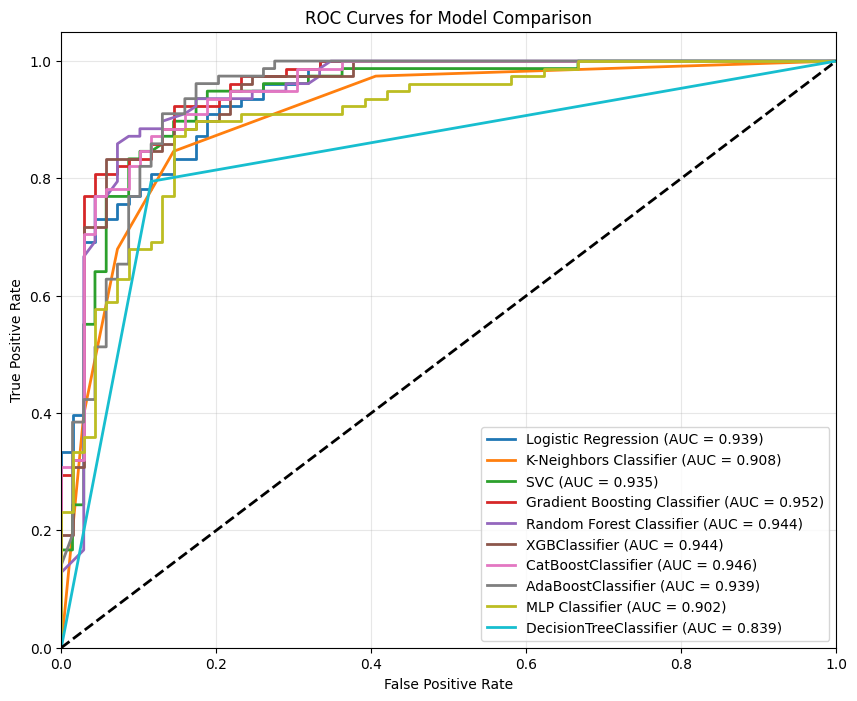

AUC Scores (higher is better):
Gradient Boosting Classifier: 0.9519
CatBoostClassifier: 0.9465
Random Forest Classifier: 0.9444
XGBClassifier: 0.9441
Logistic Regression: 0.9394
AdaBoostClassifier: 0.9389
SVC: 0.9351
K-Neighbors Classifier: 0.9085
MLP Classifier: 0.9019
DecisionTreeClassifier: 0.8395
[0.9394277220364178, 0.9084912671869194, 0.9350613154960982, 0.9518766257896694, 0.9444444444444444, 0.9440728353771832, 0.9464882943143812, 0.9388703084355258, 0.9018952062430324, 0.8394648829431437]


In [ ]:
def check_predict_proba(models_dict):
    models_with_proba = {}
    
    for name, model in models_dict.items():
        if name == 'SVC':
            # SVC needs probability=True to have predict_proba
            models_with_proba[name] = SVC(probability=True)
        elif name == 'RidgeClassifier':
            # RidgeClassifier doesn't support predict_proba, so skip it
            print(f"Warning: {name} doesn't support predict_proba and will be excluded from ROC-AUC analysis")
            continue
        else:
            # Most other classifiers have predict_proba by default
            models_with_proba[name] = model
            
    return models_with_proba
# Assuming you have a dictionary of models
models_dict = models
models_with_proba = check_predict_proba(models_dict)
auc_scores = calculate_roc_auc(models_with_proba, X_test, Y_test)
auc_scores_flatten = np.array(auc_scores).flatten().tolist()


Selecting Best Model based on Evaluation Metrics

In [14]:
auc = pd.DataFrame(auc_scores_flatten)
auc_melted = pd.melt(
    auc,
    value_vars=['Logistic Regression', 'K-Neighbors Classifier',"DecisionTreeClassifier","MLP Classifier","AdaBoostClassifier","CatBoostClassifier","XGBClassifier","Random Forest Classifier","Gradient Boosting Classifier","SVC"],  # Columns to convert to rows (optional)
    var_name='Models',   # Name for the column containing original column names
    value_name='AUC Scores'
)
print(auc_melted.sort_values(by = 'AUC Scores', ascending = False))
pd.DataFrame(list(zip(model_list, f1_list, Recall_list,precision_list)), columns=['Model_Name','F1_Score','Recall','Precision']).sort_values(by=['F1_Score','Recall','Precision'],ascending=False)


                         Models  AUC Scores
8  Gradient Boosting Classifier    0.951877
5            CatBoostClassifier    0.946488
7      Random Forest Classifier    0.944444
6                 XGBClassifier    0.944073
0           Logistic Regression    0.939428
4            AdaBoostClassifier    0.938870
9                           SVC    0.935061
1        K-Neighbors Classifier    0.908491
3                MLP Classifier    0.901895
2        DecisionTreeClassifier    0.839465


,Model_Name,F1_Score,Recall,Precision
4,Random Forest Classifier,0.881579,0.858974,0.905405
6,CatBoostClassifier,0.875817,0.858974,0.893333
5,XGBClassifier,0.874172,0.846154,0.904110
3,Gradient Boosting Classifier,0.872483,0.833333,0.915493
2,SVC,0.870130,0.858974,0.881579
1,K-Neighbors Classifier,0.857143,0.846154,0.868421
8,MLP Classifier,0.847682,0.820513,0.876712
7,AdaBoostClassifier,0.843537,0.794872,0.898551
0,Logistic Regression,0.834437,0.807692,0.863014
9,DecisionTreeClassifier,0.829932,0.782051,0.884058


# Model Prediction

##### Based on the metric information we use Random Forest Classifier for Model Prediction Since it has highest F1 Score and Recall Values and Very High AUC Score

In [15]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, Y_train)
Y_pred = rfc_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))
print("\nConfusion Matrix: ")
print(confusion_matrix(Y_test, Y_pred))



Accuracy: 0.8639455782312925

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        69
           1       0.89      0.85      0.87        78

    accuracy                           0.86       147
   macro avg       0.86      0.87      0.86       147
weighted avg       0.87      0.86      0.86       147


Confusion Matrix: 
[[61  8]
 [12 66]]


In [16]:
print(Y_test.shape, Y_test_predict.shape)

(147,) (147,)


Text(0.5, 1.0, 'Actual vs Predicted Values')

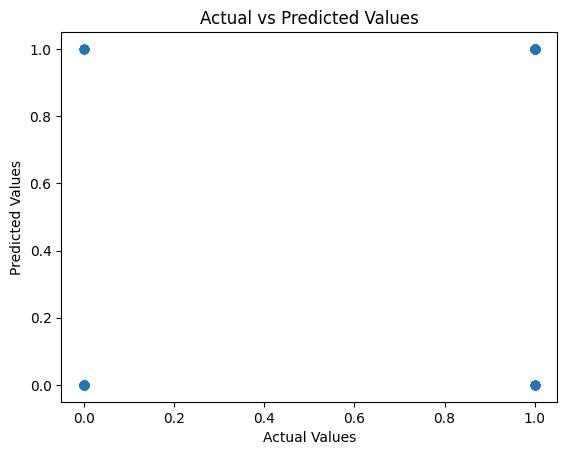

In [17]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

<Axes: xlabel='HeartDisease'>

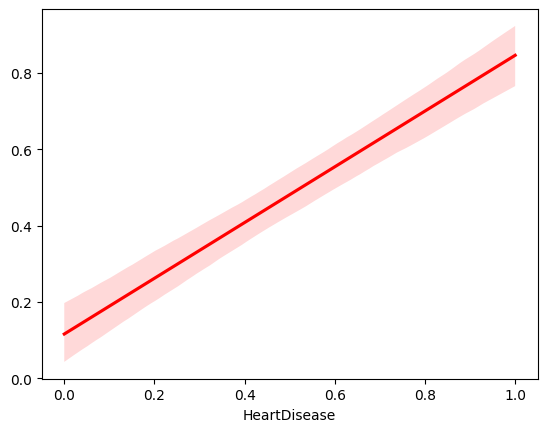

In [18]:
sns.regplot(x=Y_test, y=Y_pred, scatter=False, color='red')

In [19]:
pred_df = pd.DataFrame({'Actual Value': Y_test, 'Predicted Value': Y_pred,'Difference':Y_test-Y_pred})
pred_df

,Actual Value,Predicted Value,Difference
741,1,1,0
35,0,0,0
282,0,0,0
204,0,0,0
198,1,1,0
...,...,...,...
46,0,0,0
73,0,0,0
202,0,0,0
758,0,1,-1


### Jittered Scatter Plot for better Visualization of Model

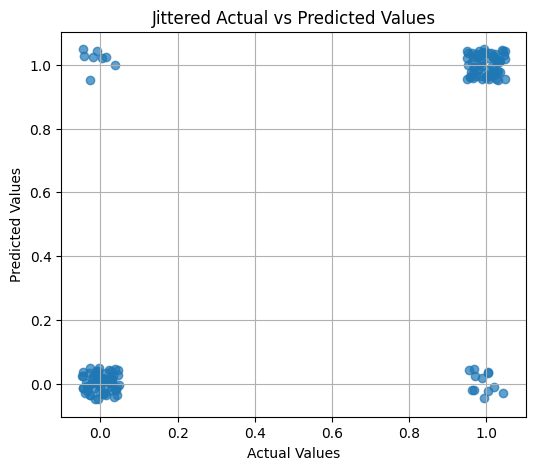

In [20]:
jitter_strength = 0.05
Y_test_jittered = Y_test + np.random.uniform(-jitter_strength, jitter_strength, size=len(Y_test))
Y_pred_jittered = Y_pred + np.random.uniform(-jitter_strength, jitter_strength, size=len(Y_pred))

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(Y_test_jittered, Y_pred_jittered, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Jittered Actual vs Predicted Values")
plt.grid(True)
plt.show()